My objective here is to practise the concept of singular value decomposition and principal component analysis using dataset that is close to a real world case.

And i was following this tutorial -> http://databookuw.com/page-2/page-4/

data is from here -> ttps://github.com/jooyongsim/numerical2023/blob/main/ovariancancer_obs.csv I found the ovarain dataset here

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
import pandas as pd

# Load the numerical data
obs = pd.read_csv("/home/antonyg/Documents/ml craftmanship/ovariancancer_obs.csv", header=None).values  # Converts to numpy array

# Load the group labels
grp = pd.read_csv("/home/antonyg/Documents/ml craftmanship/ovariancancer_obs.csv", header=None)[0].tolist()



U: Orthogonal matrix representing the left singular vectors (features in the original space).

S: Diagonal matrix containing singular values (variance captured by each principal component).

VT: Orthogonal matrix representing the right singular vectors (principal components in PCA).

In [39]:
# computing the SVD
U, S, VT = np.linalg.svd(obs,full_matrices=0)

In [40]:
U.shape, S.shape, VT.shape

((216, 216), (216,), (216, 4000))

S: Singular values, representing the amount of variance captured by each principal component.
    
VT: Transposed matrix of right singular vectors, where each row corresponds to a principal component

semilogy function in Matplotlib is used to create a plot where the y-axis is on a logarithmic scale and the x-axis is on a linear scale. Singular values often decrease exponentially, so a logarithmic scale makes it easier to see their distribution clearly.

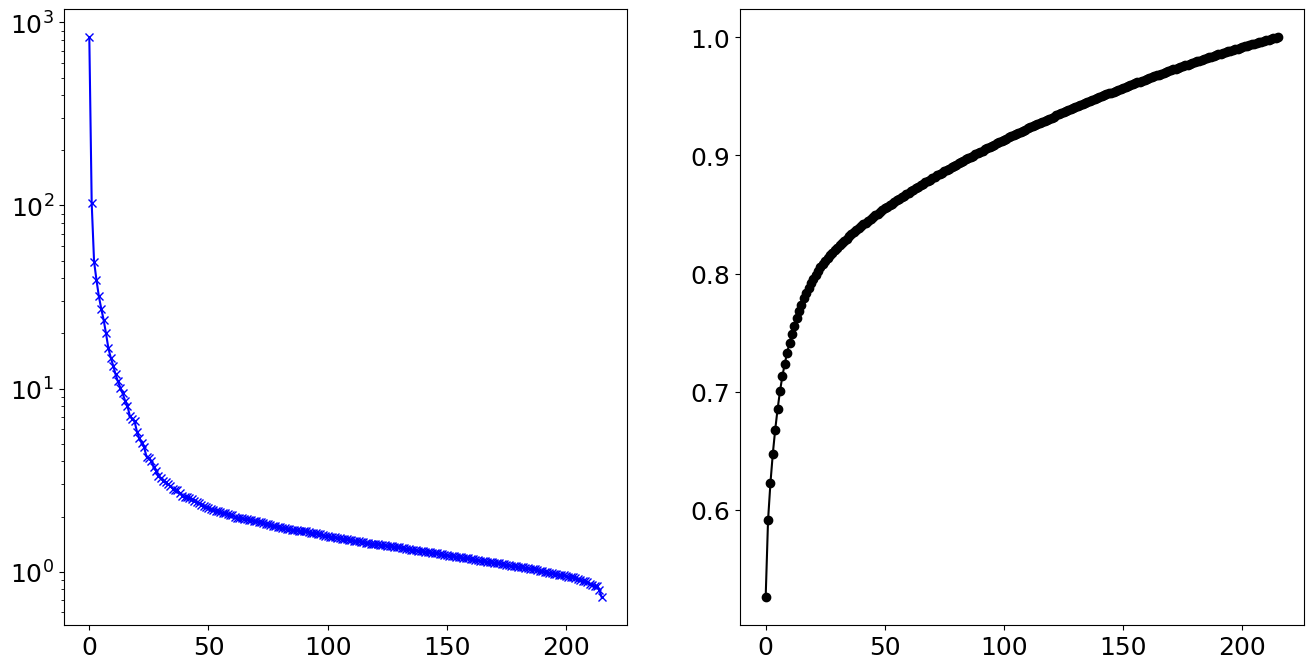

In [38]:
fig1 = plt.figure()

#shows how much variance each singular value captures.
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-x',color='blue')

# shows cumulative variance, indicating how many components 
# are needed to capture most of the variance.
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

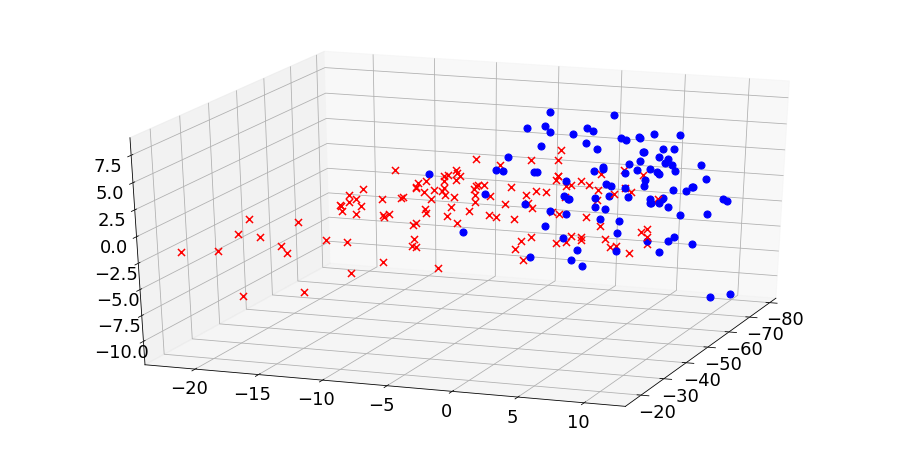

In [45]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()